In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from perceptron import Perceptron_
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import Perceptron

In [3]:
digits = load_digits(n_class=2, return_X_y=True)
X, y = digits
y[y==0] = -1

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, shuffle=True, random_state=42)

In [7]:
best_accuracy = 0
best_alpa = 0
alpha_values = np.linspace(0.0001, 0.1, num=100)
accuracies = []
precisions = []
recalls = []
f1_scores = []
for alpha in alpha_values:
    perceptron_model = Perceptron_(alpha)
    perceptron_model.train(X_train, y_train)
    pred = perceptron_model.predict(X_val)
    acc = accuracy_score(y_val, pred)
    prec = precision_score(y_val, pred)
    rec = recall_score(y_val, pred)
    f1 = f1_score(y_val, pred)
    accuracies.append(acc)
    precisions.append(prec)
    recalls.append(rec)
    f1_scores.append(f1)
    if(best_accuracy < acc):
        best_accuracy = acc
        best_alpha = alpha
best_accuracy, best_alpha

(1.0, 0.004136363636363637)

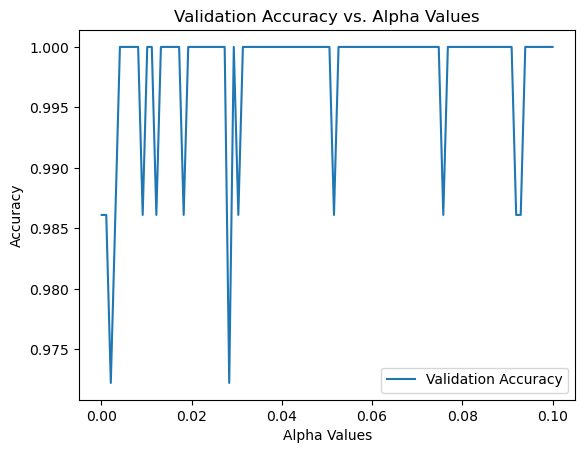

In [8]:
# Plot the results
plt.plot(alpha_values, accuracies, label='Validation Accuracy')
plt.xlabel('Alpha Values')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy vs. Alpha Values')
plt.legend()
plt.show()

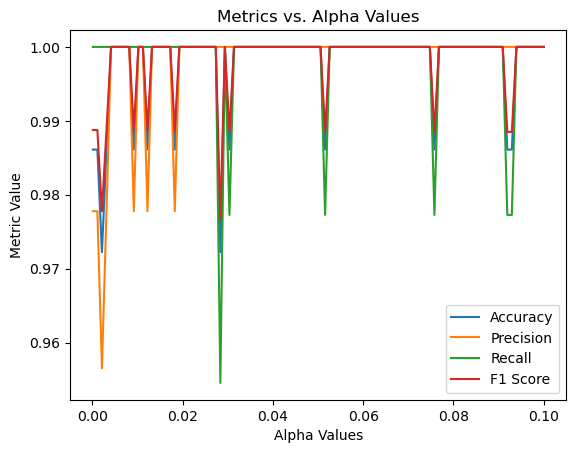

In [9]:
# Plot the results
plt.plot(alpha_values, accuracies, label='Accuracy')
plt.plot(alpha_values, precisions, label='Precision')
plt.plot(alpha_values, recalls, label='Recall')
plt.plot(alpha_values, f1_scores, label='F1 Score')

plt.xlabel('Alpha Values')
plt.ylabel('Metric Value')
plt.title('Metrics vs. Alpha Values')
plt.legend()
plt.show()


In [10]:
perceptron_model2 = Perceptron_(best_alpha)
perceptron_model2.train(X_train, y_train)
pred2 = perceptron_model2.predict(X_val)
y_pred_test = perceptron_model2.predict(X_test)
acc = accuracy_score(y_test, y_pred_test)
prec = precision_score(y_test, y_pred_test)
rec = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)
acc, prec, rec, f1

(1.0, 1.0, 1.0, 1.0)

In [11]:
# use the sklearn Perceptron
clf = Perceptron()
clf.fit(X_train, y_train)
# Predictions on the validation set
y_pred_val = clf.predict(X_val)

# Calculate accuracy on the validation set
accuracy_val = accuracy_score(y_val, y_pred_val)

# Now, let's make predictions on the test set
y_pred_test = clf.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred_test)

# Precision
precision = precision_score(y_test, y_pred_test)

# Recall
recall = recall_score(y_test, y_pred_test)

# F1 Score
f1 = f1_score(y_test, y_pred_test)
print(f"Validation set accuracy: {accuracy_val:.4f}")
print(f"Test set accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Validation set accuracy: 1.0000
Test set accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
